# **Airbnb Analysis - London (Weekends)**

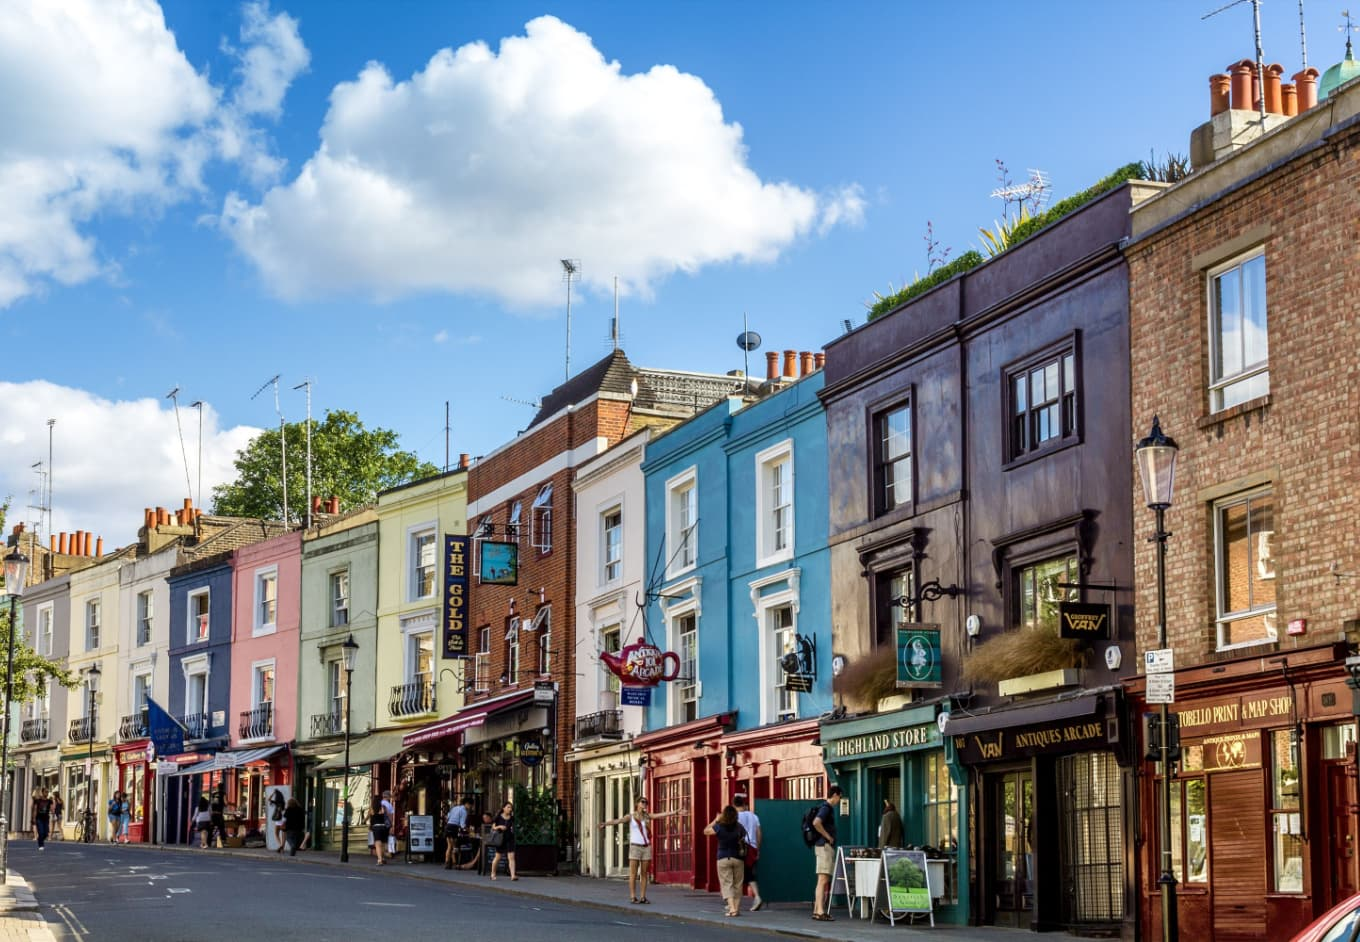

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lair = pd.read_csv('/content/london_weekends.csv')

In [ ]:
lair.columns.values.tolist()

['Unnamed: 0',
 'realSum',
 'room_type',
 'room_shared',
 'room_private',
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

# Data Cleansing

Compare the occurrence of each attribute ('room_type',
 'room_shared',
 'room_private',
 'person_capacity', 'cleanliness_rating',
 'host_is_superhost', 'bedrooms',
 'dist') 
 to each customer rating ('guest_satisfaction_overall')

In [ ]:
lair = lair.drop(columns=['Unnamed: 0',
 'realSum','multi',
 'biz','metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat'])

Convert boolean columns to integers

In [ ]:
lair['room_private'] = lair['room_private'].astype(int)
lair['host_is_superhost'] = lair['host_is_superhost'].astype(int)

# Insights

Run a significance test of each attribute as it compares to each customer rating ('guest_satisfaction_overall')

Text(0.5, 1.0, 'Correlation Heatmap')

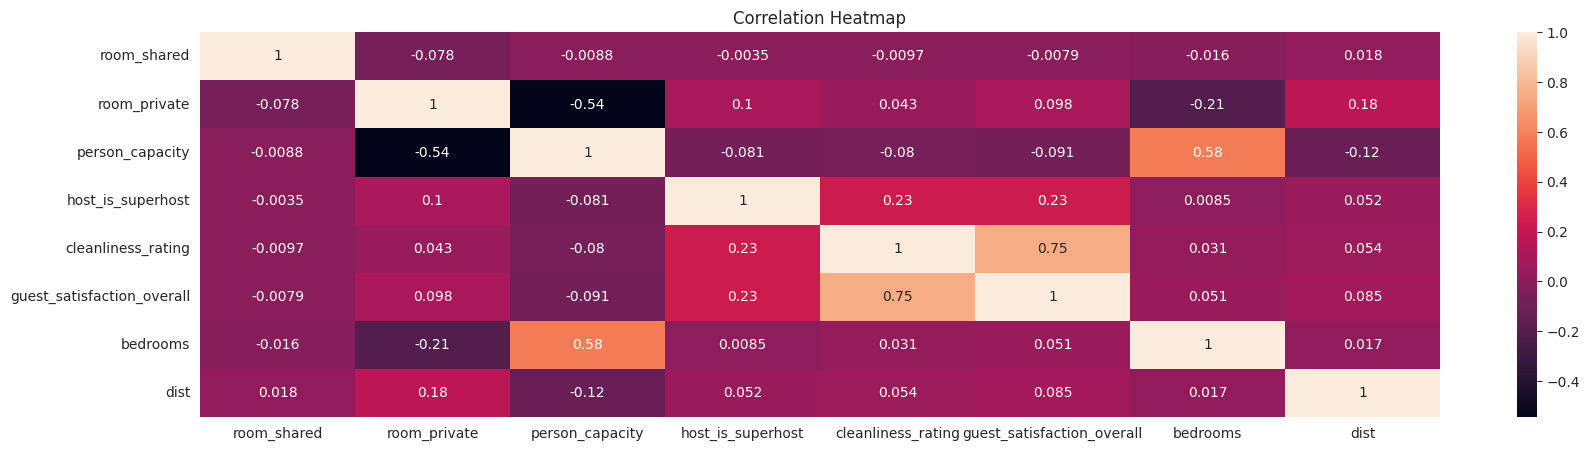

In [ ]:
lair_corr = lair.corr()
sns.heatmap(lair_corr, annot=True)
plt.title('Correlation Heatmap')

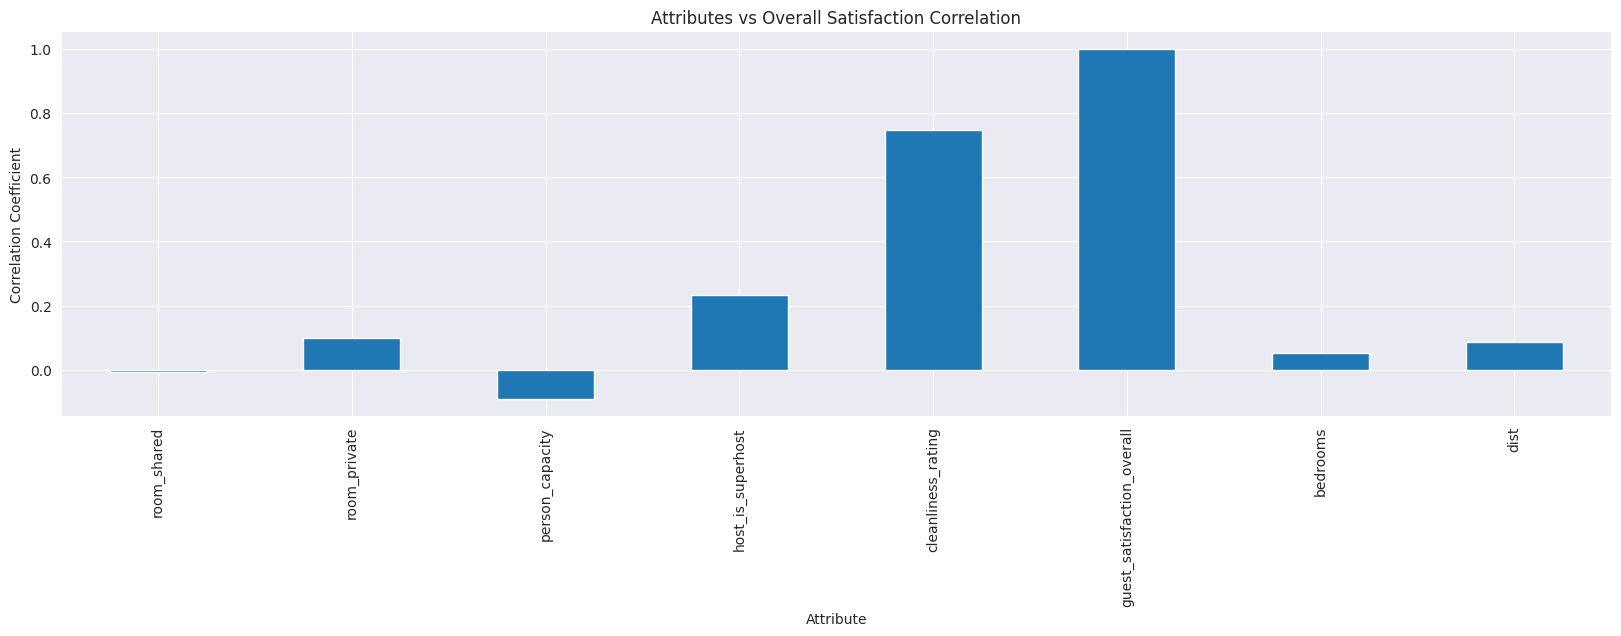

In [ ]:
lair_corr['guest_satisfaction_overall'].plot(kind='bar')
plt.title('Attributes vs Overall Satisfaction Correlation')
plt.xlabel('Attribute')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
lair_dep = lair['guest_satisfaction_overall']
lair_ind = lair[['room_private', 'host_is_superhost', 'cleanliness_rating']]
lair_reg = sm.OLS(lair_dep, lair_ind).fit()
lair_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     guest_satisfaction_overall   R-squared (uncentered):                   0.992
Model:                                    OLS   Adj. R-squared (uncentered):              0.992
Method:                         Least Squares   F-statistic:                          2.348e+05
Date:                        Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                                02:57:21   Log-Likelihood:                         -18800.
No. Observations:                        5379   AIC:                                  3.761e+04
Df Residuals:                            5376   BIC:                                  3.763e+04
Df Model:                                   3                                                  
Covariance Type:                    nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
room_private           2.0166      0.218      9.239      0.000       1.589       2.444
host_is_superhost      0.3694      0.296      1.247      0.213      -0.211       0.950
cleanliness_rating     9.7245      0.018    541.342      0.000       9.689       9.760
==============================================================================
Omnibus:                     2694.576   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82119.744
Skew:                          -1.797   Prob(JB):                         0.00
Kurtosis:                      21.801   Cond. No.                         25.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lair_reg.params

room_private          2.016597
host_is_superhost     0.369358
cleanliness_rating    9.724494
dtype: float64

Create a model that predicts the rating of a listing based on its attributes

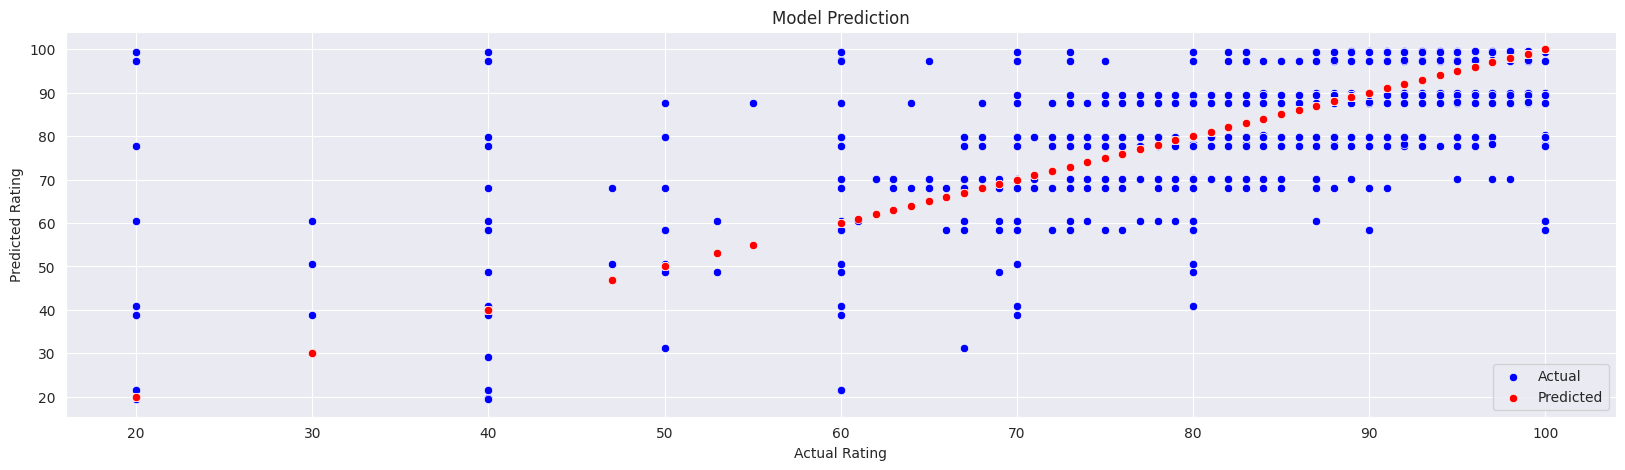

In [ ]:
lair['Prediction'] = lair_reg.predict(lair_ind)

ax = sns.scatterplot(data=lair, x='guest_satisfaction_overall', y='Prediction', color='blue')
sns.scatterplot(data=lair, x='guest_satisfaction_overall', y='guest_satisfaction_overall', color='red', ax=ax)
ax.set_xlabel('Actual Rating')
ax.set_ylabel('Predicted Rating')
ax.set_title('Model Prediction')
ax.legend(['Actual', 'Predicted'])
plt.show()